# Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import random

### Các thư viện I/O, File
import os
import glob
import shutil
import zipfile
### Các thư viện hình ảnh (bổ sung)
import PIL
import matplotlib.image as mpimg 

###################################################
import tensorflow as tf


from tensorflow.keras.preprocessing import image

# Download and Extract data

In [ ]:
GTSRB_DATA_URL = "https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip"
tf.keras.utils.get_file(
    fname = 'GTSRB_Final_Training_Images.zip', 
    origin = GTSRB_DATA_URL, 
    cache_subdir='datasets', 
    extract=True
)
DOWNLOAD_PATH = "/root/.keras/datasets/"
GTSRB_DATA_PATH = os.path.join(DOWNLOAD_PATH,  "GTSRB/Final_Training/Images")

In [2]:
DOWNLOAD_PATH = "/Users/macintosh/Desktop"
GTSRB_DATA_PATH = os.path.join(DOWNLOAD_PATH,  "GTSRB/Final_Training/Images")

In [3]:
N_CLASSES = 43
RESIZED_HIGHT = RESIZED_WIDTH = 50
RESIZED_IMAGE = (RESIZED_HIGHT, RESIZED_WIDTH)

In [4]:
def load_labels_from_one_directory(SOURCE):
    csv_parten = os.path.join(SOURCE, '*.csv')
    csv_file = glob.glob(csv_parten)[0]
    df = pd.read_csv(csv_file, delimiter=";")
    df.drop('Filename', axis = 1, inplace = True)
    return df

def load_image_file(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size= RESIZED_IMAGE)  
    arr_img = tf.keras.preprocessing.image.img_to_array(img)
    return arr_img

def load_image_from_one_directory(SOURCE):
    img_paths = glob.glob(SOURCE + '/*.ppm')
    ordered_img_paths = sorted(img_paths)
    return [load_image_file(img_path) for img_path in ordered_img_paths] 

def get_data(SOURCE):
    list_label_df = []
    images = []
    for i in range(N_CLASSES):
        CURRENT_DIR = format(i, '05d')
        CURRENT_PATH = os.path.join(SOURCE, CURRENT_DIR)
        list_label_df.append(load_labels_from_one_directory(CURRENT_PATH))
        images.extend(load_image_from_one_directory(CURRENT_PATH))
    labels = pd.concat(list_label_df, ignore_index=True)
    return images, labels

In [5]:
images, df = get_data(GTSRB_DATA_PATH)

# Overview on Images and Labels

## Images

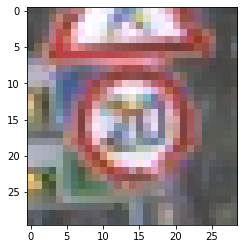

In [42]:
from PIL import Image, ImageDraw

img_pil = Image.open(GTSRB_DATA_PATH + "/00000/00000_00000.ppm")
type(img_pil)
plt.imshow(img_pil)

In [43]:
img_pil2 = img_pil.copy()

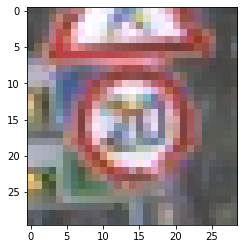

In [44]:
plt.imshow(img_arr)

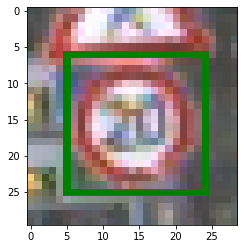

In [45]:
draw = ImageDraw.Draw(img_pil)
draw.rectangle([5, 6, 24, 25], outline="green", width=1)
plt.imshow(img_pil)

In [ ]:
nrows = 4
ncols = 5
fig, ax = plt.subplots(nrows, ncols)
#fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

  

for i in range(nrows):  # chọn vài folder bất kì
    no_dir = random.choice(range(N_CLASSES))
    dir_path = os.path.join(GTSRB_DATA_PATH, format(no_dir, '05d'))
    for j in range(ncols):  # Chọn vài hình ảnh bất kì
        img_path = random.choice(glob.glob(dir_path + "/*.ppm"))
        img = mpimg.imread(img_path)
        ax[i,j].imshow(img)

plt.show()

## Labels 

In [ ]:
labels_df.Width.min(), labels_df.Width.max()

In [ ]:
labels_df.Height.hist()

In [ ]:
labels_df.Width.hist()

In [ ]:
len(images), labels_df.shape

In [ ]:
labels_df.info()

In [ ]:
labels_df.Width.values

In [ ]:
labels_df.head()

In [ ]:
labels_df.groupby(['Width', 'Height'])['Roi.X1'].count()

In [ ]:
for i in range(len(boxes_train)):
    boxes_train[i][0] = int(boxes_train[i][0] * RESIZED_WIDTH/sizes_train[i][0])
    boxes_train[i][2] = int(boxes_train[i][2] * RESIZED_WIDTH/sizes_train[i][0])

    boxes_train[i][1] = int(boxes_train[i][1] * RESIZED_HIGHT/sizes_train[i][1])
    boxes_train[i][3] = int(boxes_train[i][3] * RESIZED_HIGHT/sizes_train[i][1])

## Update boxes after resizing and drawing box

In [ ]:
df.head()

In [ ]:
df.describe()

In [47]:

df['y_min'] = df['Roi.Y1'] /df.Height
df['x_min'] =  df['Roi.X1'] /df.Width

df['y_max'] = df['Roi.Y2'] /df.Height
df['x_max'] =  df['Roi.X2'] /df.Width

In [ ]:
df.head()

In [ ]:
df.loc[28589]

In [48]:
def update_box():
    df['Roi.X1']  =  df['Roi.X1'] * RESIZED_WIDTH / df['Width']
    df['Roi.X2']  =  df['Roi.X2'] * RESIZED_WIDTH / df['Width']
    df['Roi.Y1']  =  df['Roi.Y1'] * RESIZED_HIGHT / df['Height']
    df['Roi.X2']  =  df['Roi.Y2'] * RESIZED_HIGHT / df['Height']

update_box()

In [ ]:

plt.imshow(images[28589].astype('int'))
plt.show()

In [ ]:
import cv2
df.loc[28589]

In [59]:
def plot_image_with_box(img, box):
    colors = np.array([[255,0,0]]) #red colors
    img_arr = np.asarray(img)
    img_arr = np.expand_dims(img_arr, axis =0)
    
    box = box.reshape([1, 1, 4])
    
    new_img = tf.image.draw_bounding_boxes(img_arr, box, colors)
    plt.imshow(new_img[0]/255.0)
    plt.show()

In [60]:
box = df.loc[450][['y_min',	'x_min', 'y_max', 'x_max']].values
img = images[450]

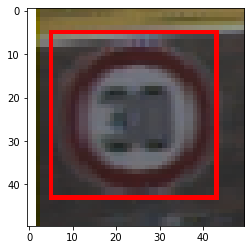

In [61]:
plot_image_with_box(img, box)

In [ ]:

#colors = np.array([[1.0, 0.0, 0.0], [0.0, 0.0, 1.0]])
colors = np.array([[255,0,0]])

#28589
box = df.loc[450][['y_min',	'x_min', 'y_max', 'x_max']].values.astype('float32')
boxes = box.reshape([1, 1, 4])

img = np.expand_dims(images[450].astype('float32'), axis =0)






## Code test

# Prepare the train and test sets

In [ ]:
#Creat split data
from sklearn.model_selection import train_test_split

y = df.ClassId.values
index_train, index_test, y_train, y_test = train_test_split(range(df.shape[0]), y, shuffle = True, stratify = y, 
                                                      train_size = 0.8, random_state = 42)
X_train = [images[id] for id in index_train]
X_test = [images[id] for id in index_test]

boxes_train = df.loc[index_train, ['Roi.X1','Roi.Y1','Roi.X2','Roi.Y2']].values
boxes_test = df.loc[index_test, ['Roi.X1','Roi.Y1','Roi.X2','Roi.Y2']].values

In [ ]:
len(X_test), len(y_test), boxes_test.shape

In [ ]:
#Creat my dataset(TF)

def my_func(a, b, c):
    a = tf.cast(a, tf.float32)/255.0
    b = tf.cast(b, tf.float32)
    c = tf.cast(b, tf.float32)
    return (a, (b, c))

def creat_dataset(X, y, boxes, shuffle, batch_size): #, shuffle
    ds = tf.data.Dataset.from_tensor_slices((X, y, boxes))
    ds = ds.map(my_func, num_parallel_calls=tf.data.AUTOTUNE)
    #dataset.map(time_consuming_mapping).cache().map(memory_consuming_mapping)
    if shuffle:
         shuffle_buffer = int(len(X)/10)
         ds = ds.shuffle(shuffle_buffer)
    ds = ds.repeat() # Mandatory for Keras for now
    ds = ds.batch(batch_size, drop_remainder = True).prefetch(1) # -1 = tf.data.experimental.AUTOTUNE, drop_remainder=True for TPU
    return ds

In [ ]:
import multiprocessing
cores = multiprocessing.cpu_count()
## num_parallel_calls= cores ##
print(cores)

In [ ]:
ds_train = creat_dataset(X_train, y_train, boxes_train, shuffle = True, batch_size= 64)
ds_test = creat_dataset(X_test, y_test, boxes_test, shuffle = False, batch_size = 16) 

In [ ]:
test_ds.element_spec

# 4. Model

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import Input 
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils.vis_utils import plot_model

In [ ]:
def feature_extractor(inputs):
    x = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(inputs) # input_shape=(RESIZED_HIGHT, RESIZED_WIDTH, 3)
    x = tf.keras.layers.AveragePooling2D((2, 2))(x)

    #x = tf.keras.layers.Conv2D(32, kernel_size=3,activation='relu')(x)
    #x = tf.keras.layers.AveragePooling2D((2, 2))(x)

    #x = tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu')(x)
    #x = tf.keras.layers.AveragePooling2D((2, 2))(x)

    return x

def dense_layers(inputs):
  x = tf.keras.layers.Flatten()(inputs)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  return x

In [ ]:
def classifier(inputs):

  classification_output = tf.keras.layers.Dense(43, activation='softmax', name = 'classification')(inputs)
  return classification_output


def bounding_box_regression(inputs):
    bounding_box_regression_output = tf.keras.layers.Dense(units = '4', name = 'bounding_box')(inputs)
    return bounding_box_regression_output

In [ ]:
def final_model(inputs):
    feature_cnn = feature_extractor(inputs)
    dense_output = dense_layers(feature_cnn)

    classification_output = classifier(dense_output)
    bounding_box_output = bounding_box_regression(dense_output)

    model = tf.keras.Model(inputs = inputs, outputs = [classification_output, bounding_box_output])

    return model
  

inputs = tf.keras.layers.Input(shape=(RESIZED_HIGHT, RESIZED_WIDTH, 3))
model = final_model(inputs)

# print model layers
#model.summary()
plot_model(model, show_shapes=True, show_layer_names=True, to_file='base-model.png')


In [ ]:
def intersection_over_union(pred_box, true_box):
    xmin_pred, ymin_pred, xmax_pred, ymax_pred =  tf.split(pred_box, 4, axis = 1)
    xmin_true, ymin_true, xmax_true, ymax_true = tf.split(true_box, 4, axis = 1)


    xmin_overlap = tf.math.maximum(xmin_pred, xmin_true)
    xmax_overlap = tf.math.minimum(xmax_pred, xmax_true)
    ymin_overlap = tf.math.maximum(xmin_pred, xmin_true)
    ymax_overlap = tf.math.minimum(ymax_pred, ymax_true)

    pred_box_area = (xmax_pred - xmin_pred ) * (ymax_pred - ymin_pred )
    true_box_area = (xmax_true - xmin_true) * (ymax_true - ymin_true)

    overlap_area = tf.math.maximum((xmax_overlap - xmin_overlap), 0)  * tf.math.maximum((ymax_overlap - ymin_overlap), 0)
    union_area = (pred_box_area + true_box_area) - overlap_area

    iou = overlap_area / union_area

    return iou

In [ ]:
model.compile(optimizer='adam', 
              loss = {'classification' : 'sparse_categorical_crossentropy',
                      'bounding_box' : 'mse'
                     },
              metrics = {'classification' : 'accuracy',
                         'bounding_box' : intersection_over_union
                        })

# 50. FIT TRAIN

In [ ]:
len(y_train)

In [ ]:
model.fit(ds_train)

In [ ]:
EPOCHS = 20 # 45
steps_per_epoch = len(y_train)//64  
validation_steps = len(y_test)//16

#model.fit()
history = model.fit(train_ds, epochs=EPOCHS,
                    steps_per_epoch=steps_per_epoch
                    #validation_data=test_ds, 
                    #validation_steps=validation_steps
                    )